**Exercise 10: Principal Component Analysis**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```

4. Move the 10_exercise_pca.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises/10_exercise_pca.ipynb
```

In this exercise, we will using PCA for dimensionality reduction as a mean of visualizing high dimensional data. Then we will test out the loss as we decrease the number of principal components. Finally, we will use it as a feature extractor and show that we can compress the data for the downstream classification task.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Report your reconstruction loss for training and testing sets and your classification scores for training and validation sets.

```
***** Fitting PCA with 1 components on iris dataset *****
Training set mean squared error: 0.0834
Validation set mean squared error: 0.0946
***** Fitting PCA with 2 components on iris dataset *****
Training set mean squared error: 0.0260
Validation set mean squared error: 0.0241
***** Fitting PCA with 3 components on iris dataset *****
Training set mean squared error: 0.0058
Validation set mean squared error: 0.0066
***** Fitting PCA with 4 components on iris dataset *****
Training set mean squared error: 0.0000
Validation set mean squared error: 0.0000


***** Fitting PCA with 1 components on wine dataset *****
Training set mean squared error: 14.2969
Validation set mean squared error: 15.5133
***** Fitting PCA with 2 components on wine dataset *****
Training set mean squared error: 1.3526
Validation set mean squared error: 1.1760
***** Fitting PCA with 3 components on wine dataset *****
Training set mean squared error: 0.6111
Validation set mean squared error: 0.5310
***** Fitting PCA with 4 components on wine dataset *****
Training set mean squared error: 0.2033
Validation set mean squared error: 0.2519
***** Fitting PCA with 5 components on wine dataset *****
Training set mean squared error: 0.1149
Validation set mean squared error: 0.1286
***** Fitting PCA with 6 components on wine dataset *****
Training set mean squared error: 0.0528
Validation set mean squared error: 0.0524
***** Fitting PCA with 7 components on wine dataset *****
Training set mean squared error: 0.0305
Validation set mean squared error: 0.0335
***** Fitting PCA with 8 components on wine dataset *****
Training set mean squared error: 0.0191
Validation set mean squared error: 0.0204
***** Fitting PCA with 9 components on wine dataset *****
Training set mean squared error: 0.0102
Validation set mean squared error: 0.0127
***** Fitting PCA with 10 components on wine dataset *****
Training set mean squared error: 0.0050
Validation set mean squared error: 0.0059
***** Fitting PCA with 11 components on wine dataset *****
Training set mean squared error: 0.0024
Validation set mean squared error: 0.0018
***** Fitting PCA with 12 components on wine dataset *****
Training set mean squared error: 0.0007
Validation set mean squared error: 0.0006
***** Fitting PCA with 13 components on wine dataset *****
Training set mean squared error: 0.0000
Validation set mean squared error: 0.0000

***** Results of Logistic Regression using PCA with 1 components on iris dataset *****
Training set mean accuracy: 0.9417
Validation set mean accuracy: 0.9000
***** Results of Logistic Regression using PCA with 2 components on iris dataset *****
Training set mean accuracy: 0.9583
Validation set mean accuracy: 0.9333
***** Results of Logistic Regression using PCA with 3 components on iris dataset *****
Training set mean accuracy: 0.9750
Validation set mean accuracy: 0.9667
***** Results of Logistic Regression using PCA with 4 components on iris dataset *****
Training set mean accuracy: 0.9750
Validation set mean accuracy: 1.0000


***** Results of Logistic Regression using PCA with 1 components on wine dataset *****
Training set mean accuracy: 0.7394
Validation set mean accuracy: 0.5833
***** Results of Logistic Regression using PCA with 2 components on wine dataset *****
Training set mean accuracy: 0.7394
Validation set mean accuracy: 0.6111
***** Results of Logistic Regression using PCA with 3 components on wine dataset *****
Training set mean accuracy: 0.8451
Validation set mean accuracy: 0.6944
***** Results of Logistic Regression using PCA with 4 components on wine dataset *****
Training set mean accuracy: 0.9718
Validation set mean accuracy: 0.8333
***** Results of Logistic Regression using PCA with 5 components on wine dataset *****
Training set mean accuracy: 0.9789
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 6 components on wine dataset *****
Training set mean accuracy: 0.9859
Validation set mean accuracy: 0.9167
***** Results of Logistic Regression using PCA with 7 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 8 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 9 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 10 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 11 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 12 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.9167
***** Results of Logistic Regression using PCA with 13 components on wine dataset *****
Training set mean accuracy: 0.9930
Validation set mean accuracy: 0.8889

```

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [1]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
np.random.seed = 1

Load datasets

In [2]:
# Load datasets
datasets = [
    skdata.load_iris(),
    skdata.load_wine()
]

dataset_names = [
    'iris',
    'wine'
]

# Set colors
colors = [
    'tab:blue',
    'tab:green',
    'tab:red'
]

Perform PCA on datasets and visualize

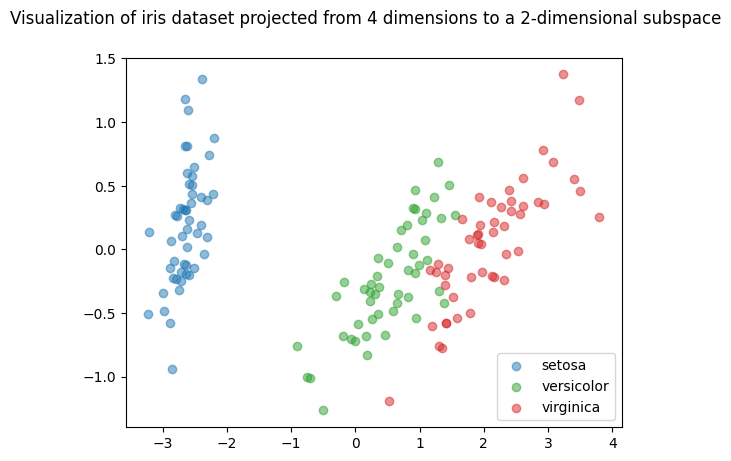

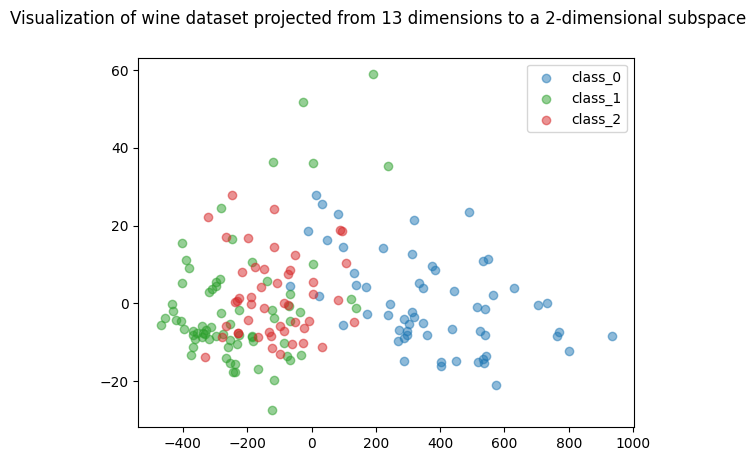

In [3]:
# Zip up all dataset options
dataset_options = zip(
    datasets,
    dataset_names)

for dataset, dataset_name in dataset_options:

    X = dataset.data
    y = dataset.target
    names = dataset.target_names

    n_dim = X.shape[-1]

    # TODO: Instantiate PCA with 2 components (dimensions)
    pca = PCA(n_components=2)

    # TODO: Fit PCA to data
    pca.fit(X)


    # TODO: Use PCA to project (transform) all data points to lower dimensions
    Z = pca.transform(X)

    # TODO: Create figure
    fig = plt.figure()

    # TODO: Create super title 'Visualization of {} dataset projected from {} dimensions to a 2-dimensional subspace'
    fig.suptitle('Visualization of {} dataset projected from {} dimensions to a 2-dimensional subspace'.format(dataset_name, n_dim))
    # TODO: Instantiate axis for subplot of a 1 x 1 figure
    ax = fig.add_subplot(1, 1, 1)

    # Iterate through each class and plot them into the figure as scatter plot with different colors
    for label, color, name in zip(np.sort(np.unique(y)), colors, names):

        # TODO: Select from projected points the ones belonging to current class
        idx = label == y
        Z_label = Z[idx, :]

        # TODO: Plot using scatter for selected points with associated color
        # set the points label as name, set alpha to 0.5
        ax.scatter(Z_label[:, 0], Z_label[:, 1], c=color, label=name, alpha=0.5)

    # TODO: Turn on legend and set loc to best
    ax.legend(loc='best')
    plt.show()


Test generalization of the learned subspace through reconstruction loss

***** Fitting PCA with 1 components on iris dataset *****
Training set mean squared error: 0.0834
Validation set mean squared error: 0.0946
***** Fitting PCA with 2 components on iris dataset *****
Training set mean squared error: 0.0260
Validation set mean squared error: 0.0241
***** Fitting PCA with 3 components on iris dataset *****
Training set mean squared error: 0.0058
Validation set mean squared error: 0.0066
***** Fitting PCA with 4 components on iris dataset *****
Training set mean squared error: 0.0000
Validation set mean squared error: 0.0000


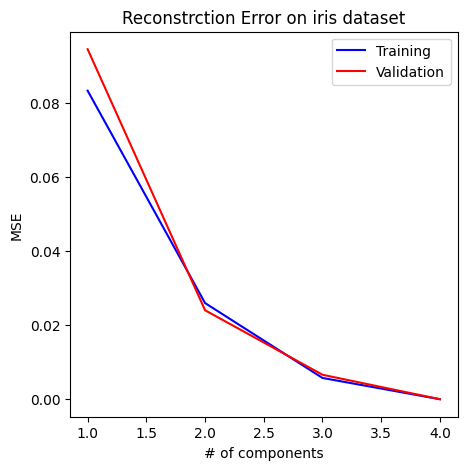



***** Fitting PCA with 1 components on wine dataset *****
Training set mean squared error: 14.2969
Validation set mean squared error: 15.5133
***** Fitting PCA with 2 components on wine dataset *****
Training set mean squared error: 1.3526
Validation set mean squared error: 1.1760
***** Fitting PCA with 3 components on wine dataset *****
Training set mean squared error: 0.6111
Validation set mean squared error: 0.5310
***** Fitting PCA with 4 components on wine dataset *****
Training set mean squared error: 0.2033
Validation set mean squared error: 0.2519
***** Fitting PCA with 5 components on wine dataset *****
Training set mean squared error: 0.1149
Validation set mean squared error: 0.1286
***** Fitting PCA with 6 components on wine dataset *****
Training set mean squared error: 0.0528
Validation set mean squared error: 0.0524
***** Fitting PCA with 7 components on wine dataset *****
Training set mean squared error: 0.0305
Validation set mean squared error: 0.0335
***** Fitting PC

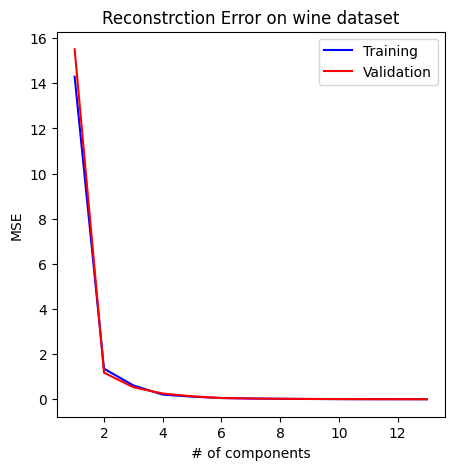

In [4]:
# Number of dimensions of subspace
dataset_components_list = [
    # For iris dataset
    range(1, 5),
    # For wine dataset
    range(1, 14)
]

# Zip up all dataset options
dataset_options = zip(
    datasets,
    dataset_components_list,
    dataset_names)

for dataset, dataset_components, dataset_name in dataset_options:

    X = dataset.data
    y = dataset.target

    # Shuffle the dataset based on sample indices
    shuffled_indices = np.random.permutation(X.shape[0])

    # Choose the first 80% as training set and the next 20% as validation
    train_split_idx = int(0.80 * X.shape[0])

    train_indices = shuffled_indices[0:train_split_idx]
    val_indices = shuffled_indices[train_split_idx:]

    # Select the examples from X and y to construct our training, validation, testing sets
    X_train, y_train = X[train_indices, :], y[train_indices]
    X_val, y_val = X[val_indices, :], y[val_indices]

    # Define empty lists to hold scores for training and validation
    mse_scores_train = []
    mse_scores_val = []

    for components in dataset_components:

        print('***** Fitting PCA with {} components on {} dataset *****'.format(components, dataset_name))

        # TODO: Instantiate PCA with specified components (dimensions)
        pca = PCA(n_components=components)

        # TODO: Fit PCA to training data
        pca.fit(X_train)

        # TODO: Project the training data, reconstruct them, and measure loss
        Z_train = pca.transform(X_train)
        X_hat_train = pca.inverse_transform(Z_train)

        mse_score_train = skmetrics.mean_squared_error(X_train, X_hat_train)
        print('Training set mean squared error: {:.4f}'.format(mse_score_train))

        # TODO: Project the validation data, reconstruct them, and measure loss
        Z_val = pca.transform(X_val)
        X_hat_val = pca.inverse_transform(Z_val)

        mse_score_val =  skmetrics.mean_squared_error(X_val, X_hat_val)
        print('Validation set mean squared error: {:.4f}'.format(mse_score_val))

        # TODO: Append training and validation scores to lists of training and validation scores
        mse_scores_train.append(mse_score_train)
        mse_scores_val.append(mse_score_val)

    # TODO: Create figure with figsize=(5, 5)
    fig = plt.figure(figsize=(5, 5))

    # TODO: Instantiate axis for subplot of a 1 x 1 figure
    ax = fig.add_subplot(1, 1, 1)

    # TODO: Plot the the number of components on the x-axis and training mse scores on the y-axis with color='blue', label='Training'
    ax.plot(dataset_components, mse_scores_train, color='blue', label='Training')

    # TODO: Plot the the number of components on the x-axis and validation mse scores on the y-axis with color='red', label='Validation'
    ax.plot(dataset_components, mse_scores_val, color='red', label='Validation')

    # TODO: Set title to 'Reconstrction Error on {} dataset'
    ax.set_title('Reconstrction Error on {} dataset'.format(dataset_name))

    # TODO: Set xlabel to '# of components'
    ax.set_xlabel('# of components')

    # TODO: Set ylabel to 'MSE'
    ax.set_ylabel('MSE')

    # TODO: Set legend with loc='upper right'
    ax.legend(loc='upper right')

    plt.show()
    print('')
    print('')

Use PCA as a feature extractor for logistic regression

***** Results of Logistic Regression using PCA with 1 components on iris dataset *****
Training set mean accuracy: 0.9417
Validation set mean accuracy: 0.9000
***** Results of Logistic Regression using PCA with 2 components on iris dataset *****
Training set mean accuracy: 0.9583
Validation set mean accuracy: 0.9333
***** Results of Logistic Regression using PCA with 3 components on iris dataset *****
Training set mean accuracy: 0.9750
Validation set mean accuracy: 0.9667
***** Results of Logistic Regression using PCA with 4 components on iris dataset *****
Training set mean accuracy: 0.9750
Validation set mean accuracy: 1.0000


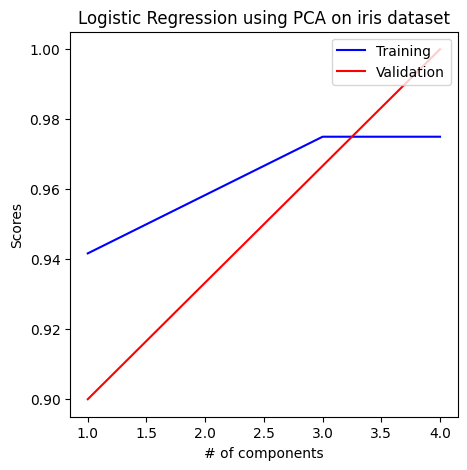


***** Results of Logistic Regression using PCA with 1 components on wine dataset *****
Training set mean accuracy: 0.7394
Validation set mean accuracy: 0.5833
***** Results of Logistic Regression using PCA with 2 components on wine dataset *****
Training set mean accuracy: 0.7394
Validation set mean accuracy: 0.6111
***** Results of Logistic Regression using PCA with 3 components on wine dataset *****
Training set mean accuracy: 0.8451
Validation set mean accuracy: 0.6944
***** Results of Logistic Regression using PCA with 4 components on wine dataset *****
Training set mean accuracy: 0.9718
Validation set mean accuracy: 0.8333
***** Results of Logistic Regression using PCA with 5 components on wine dataset *****
Training set mean accuracy: 0.9789
Validation set mean accuracy: 0.8889
***** Results of Logistic Regression using PCA with 6 components on wine dataset *****
Training set mean accuracy: 0.9859
Validation set mean accuracy: 0.9167
***** Results of Logistic Regression using PC

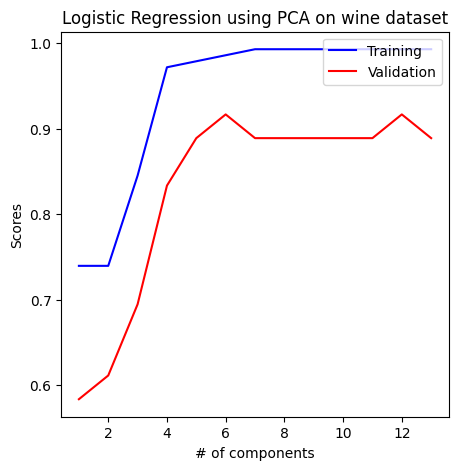

In [26]:
# Number of dimensions of subspace
dataset_components_list = [
    # For iris dataset
    range(1, 5),
    # For wine dataset
    range(1, 14)
]

# Zip up all dataset options
dataset_options = zip(
    datasets,
    dataset_components_list,
    dataset_names)

for dataset, dataset_components, dataset_name in dataset_options:

    X = dataset.data
    y = dataset.target

    # Shuffle the dataset based on sample indices
    shuffled_indices = np.random.permutation(X.shape[0])

    # Choose the first 80% as training set and the next 20% as validation
    train_split_idx = int(0.80 * X.shape[0])

    train_indices = shuffled_indices[0:train_split_idx]
    val_indices = shuffled_indices[train_split_idx:]

    # Select the examples from X and y to construct our training, validation, testing sets
    X_train, y_train = X[train_indices, :], y[train_indices]
    X_val, y_val = X[val_indices, :], y[val_indices]

    # Define empty lists to hold scores for training and validation
    scores_train = []
    scores_val = []

    for components in dataset_components:

        print('***** Results of Logistic Regression using PCA with {} components on {} dataset *****'.format(components, dataset_name))

        # TODO: Instantiate PCA with specified components (dimensions)
        pca = PCA(n_components=components)

        # TODO: Fit PCA to training data
        pca.fit(X_train)

        # TODO: Project the training data
        Z_train = pca.transform(X_train)
        Z_val = pca.transform(X_val)

        # TODO: Instantiate LogisticRegression with tol=1e-4
        logistic = LogisticRegression(tol=1e-4)

        # TODO: Train model using projected training data
        logistic.fit(Z_train, y_train)

        # TODO: Score model using mean accuracy on training set
        predictions_train = logistic.predict(Z_train)
        score_train = skmetrics.accuracy_score(y_train, predictions_train)
        print('Training set mean accuracy: {:.4f}'.format(score_train))

        # TODO: Project the validation data and test model on it
        Z_val = pca.transform(X_val)

        # TODO: Score model using mean accuracy validation set
        predictions_val = logistic.predict(Z_val)
        score_val = skmetrics.accuracy_score(y_val, predictions_val)
        print('Validation set mean accuracy: {:.4f}'.format(score_val))

        # TODO: Append training and validation scores to lists of training and validation scores
        scores_train.append(score_train)
        scores_val.append(score_val)

    # TODO: Create figure with figsize=(5, 5)
    fig = plt.figure(figsize=(5, 5))

    # TODO: Instantiate axis for subplot of a 1 x 1 figure
    ax = fig.add_subplot(1, 1, 1)

    # TODO: Plot the the number of components on the x-axis and training scores on the y-axis with color='blue', label='Training'
    ax.plot(dataset_components, scores_train, color='blue', label='Training')

    # TODO: Plot the the number of components on the x-axis and validation scores on the y-axis with color='red', label='Validation'
    ax.plot(dataset_components, scores_val, color='red', label='Validation')

    # TODO: Set title to 'Logistic Regression using PCA on {} dataset'
    ax.set_title('Logistic Regression using PCA on {} dataset'.format(dataset_name))

    # TODO: Set xlabel to '# of components'
    ax.set_xlabel('# of components')

    # TODO: Set ylabel to 'Scores'
    ax.set_ylabel('Scores')

    # TODO: Set legend with loc='upper right'
    ax.legend(loc='upper right')

    plt.show()
    print('')